## Customer segmentation using KMeans clustring

### Importing dataset

In [1]:
import pandas as pd

customers = pd.read_csv('Mall_Customers.csv')
customers.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Dropping CustomerID from calculations

In [2]:
customers.drop('CustomerID', axis=1, inplace=True)
customers.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Convert Genre to numeric values

In [3]:
from sklearn.preprocessing import LabelEncoder as le

numeric_customers = customers.drop('Genre', axis=1)
numeric_customers['Genre'] = le().fit_transform(customers['Genre'])
numeric_customers.head()


,Age,Annual Income (k$),Spending Score (1-100),Genre
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


### Check for null values

In [4]:
numeric_customers.isnull().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Genre                     0
dtype: int64

### Deciding the best K value using Elbow method

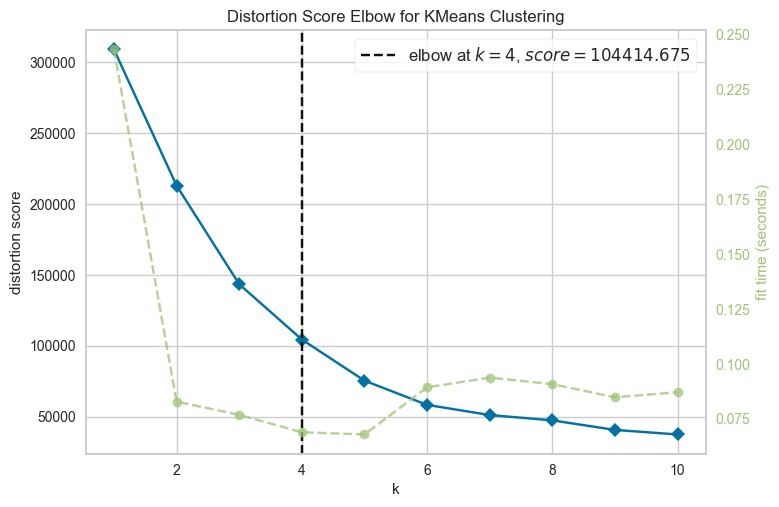

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

kmeans_clf = KMeans()
plot = KElbowVisualizer(kmeans_clf, k=(1,11), timings= True)
plot.fit(numeric_customers)
plot.show()


In [6]:
kmeans_clf = KMeans(n_clusters=4)
clusters = kmeans_clf.fit_predict(numeric_customers)
numeric_customers["cluster"] = clusters
numeric_customers.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre,cluster
0,19,15,39,1,3
1,21,15,81,1,3
2,20,16,6,0,0
3,23,16,77,0,3
4,31,17,40,0,0


In [7]:
instances0 = 0
instances1 = 0
instances2 = 0
instances3 = 0
for i in numeric_customers["cluster"]:
    if i == 0 :
        instances0  += 1
    elif i == 1:
        instances1 += 1
    elif i == 2:
        instances2 += 1 
    elif i == 3:
        instances3 += 1 

print("Cluster 0 has", instances0, "instances")
print("Cluster 1 has", instances1, "instances")
print("Cluster 2 has", instances2, "instances")
print("Cluster 3 has", instances3, "instances")

Cluster 0 has 95 instances
Cluster 1 has 38 instances
Cluster 2 has 39 instances
Cluster 3 has 28 instances


### Correlation matrix

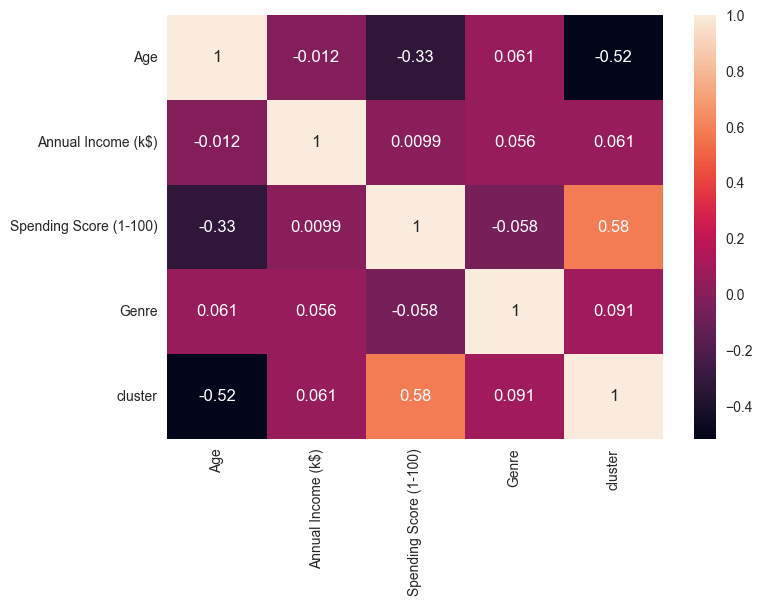

In [8]:
import seaborn as sb

sb.heatmap(numeric_customers.corr(), annot=True)
plt.show()


### Splitting train and test samples

In [9]:
from sklearn.model_selection import train_test_split

x = numeric_customers.drop('cluster', axis=1)
y = numeric_customers.cluster

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0, stratify=y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(160, 4)
(40, 4)
(160,)
(40,)


### Classifying using KNN


Actual class: [0 1 0 0 0 2 1 0 1 2 3 2 2 0 0 1 0 2 0 2 0 1 2 0 3 0 3 1 0 2 1 1 0 0 3 0 0
 0 0 3]
predictions: [0 1 0 0 0 2 1 0 1 2 3 2 2 0 0 1 0 2 0 2 0 1 2 0 3 0 3 1 0 2 1 1 0 0 3 0 0
 0 0 3]
Accuracy: 100.0 %


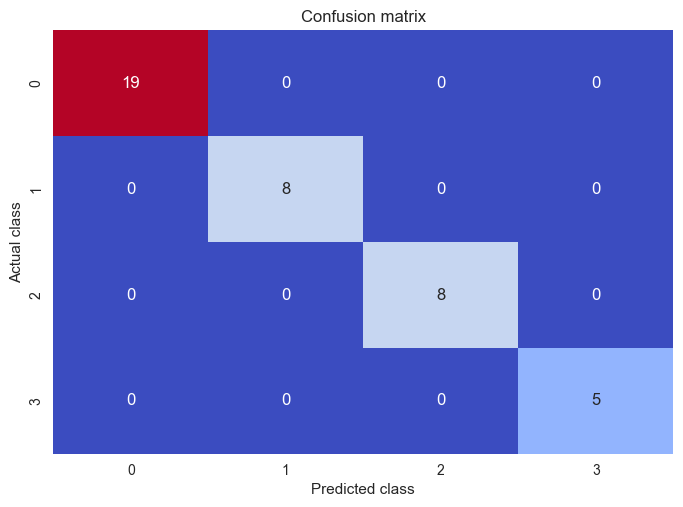

In [10]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

knn_clf = KNN(n_neighbors=1)
knn_clf.fit(x_train, y_train)
pred = knn_clf.predict(x_test)
print("Actual class:", y_test.values)
print("predictions:", pred)
print("Accuracy:", accuracy_score(y_test, pred) * 100, "%")
confusion_matrix = confusion_matrix(y_test, pred)
sb.heatmap(confusion_matrix, cmap='coolwarm', annot=True, cbar=False).set(
    xlabel='Predicted class', ylabel='Actual class', title='Confusion matrix')
plt.show()


### Precision, F1 score, error rate and sensetivity

In [11]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, pred))
print("Error rate: ", 1-(accuracy_score(y_test, pred)))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         5

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Error rate:  0.0


### ROC graph

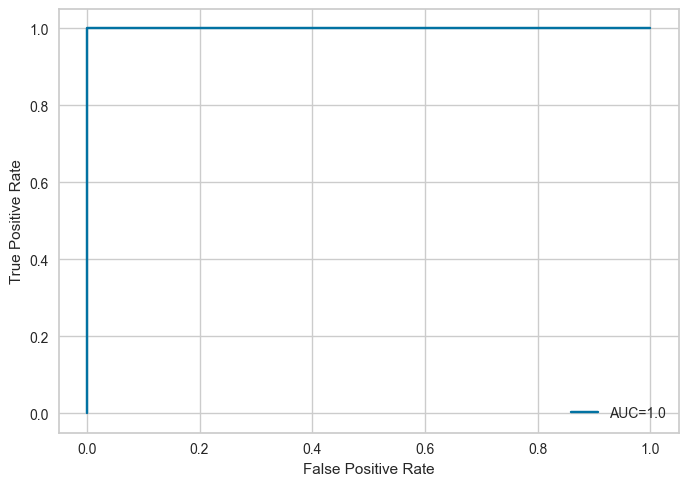

In [12]:
from sklearn import metrics

FPrate, TPrate, _ = metrics.roc_curve(y_test, pred, pos_label=3)
auc = metrics.auc(FPrate, TPrate)
plt.plot(FPrate, TPrate, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
